In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df_sugar_production = pd.read_csv ('../data/World_sugar_production_supply_and_distribution.csv')

In [3]:
df_sugar_production.head(2)

,Unnamed: 0,Unnamed: 1,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
0,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,Beginning_Stocks,117.0,194.0,253.0,220.0,198.0,131.0,222.0,97.0,...,203.0,200.0,235.0,253.0,260.0,225.0,250.0,260.0,245.0,250.0


In [4]:
df_sugar_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  336 non-null    object 
 1   Unnamed: 1  322 non-null    object 
 2   2000/01     322 non-null    float64
 3   2001/02     322 non-null    float64
 4   2002/03     322 non-null    float64
 5   2003/04     322 non-null    float64
 6   2004/05     322 non-null    float64
 7   2005/06     322 non-null    float64
 8   2006/07     322 non-null    float64
 9   2007/08     322 non-null    float64
 10  2008/09     322 non-null    float64
 11  2009/10     322 non-null    float64
 12  2010/11     322 non-null    float64
 13  2011/12     322 non-null    float64
 14  2012/13     322 non-null    float64
 15  2013/14     322 non-null    float64
 16  2014/15     322 non-null    float64
 17  2015/16     322 non-null    float64
 18  2016/17     322 non-null    float64
 19  2017/18     322 non-null    f

## rename the 2 first columns

In [5]:
df_sugar_production = df_sugar_production.rename(columns = {'Unnamed: 0': 'countries', 'Unnamed: 1' : 'prod_supl_dist'})
df_sugar_production.head(2)

,countries,prod_supl_dist,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
0,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,Beginning_Stocks,117.0,194.0,253.0,220.0,198.0,131.0,222.0,97.0,...,203.0,200.0,235.0,253.0,260.0,225.0,250.0,260.0,245.0,250.0


## subset USA only

In [6]:
df_USA = df_sugar_production[df_sugar_production['countries'] == 'United States']
df_USA

,countries,prod_supl_dist,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
17,United States,Beginning_Stocks,2013.0,1978.0,1386.0,1515.0,1721.0,1208.0,1540.0,1632.0,...,1392.0,1359.0,1250.0,1795.0,1958.0,1642.0,1647.0,1863.0,1702.0,1724.0
18,United States,Total_Sugar_Production,7956.0,7167.0,7644.0,7847.0,7146.0,6713.0,7662.0,7396.0,...,7224.0,7104.0,7700.0,8148.0,7676.0,7853.0,8155.0,8136.0,8393.0,8148.0
19,United States,Total_Imports,1443.0,1393.0,1569.0,1591.0,1905.0,3124.0,1887.0,2377.0,...,3010.0,3391.0,3294.0,2925.0,3395.0,3223.0,3031.0,2942.0,3105.0,3052.0
20,United States,Total_Supply,11412.0,10538.0,10599.0,10953.0,10772.0,11045.0,11089.0,11405.0,...,11626.0,11854.0,12244.0,12868.0,13029.0,12718.0,12833.0,12941.0,13200.0,12924.0
21,United States,Total_Exports,128.0,124.0,129.0,261.0,235.0,184.0,383.0,184.0,...,192.0,225.0,244.0,249.0,278.0,168.0,67.0,86.0,154.0,45.0
22,United States,Total_Use,9306.0,9028.0,8955.0,8971.0,9329.0,9321.0,9074.0,9711.0,...,10075.0,10379.0,10205.0,10661.0,11109.0,10903.0,10903.0,11153.0,11322.0,11481.0
23,United States,Ending_Stocks,1978.0,1386.0,1515.0,1721.0,1208.0,1540.0,1632.0,1510.0,...,1359.0,1250.0,1795.0,1958.0,1642.0,1647.0,1863.0,1702.0,1724.0,1398.0


## change the order of the df

In [7]:
df_USA = df_USA.T.reset_index()
df_USA.head(10)

,index,17,18,19,20,21,22,23
0,countries,United States,United States,United States,United States,United States,United States,United States
1,prod_supl_dist,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
2,2000/01,2013,7956,1443,11412,128,9306,1978
3,2001/02,1978,7167,1393,10538,124,9028,1386
4,2002/03,1386,7644,1569,10599,129,8955,1515
5,2003/04,1515,7847,1591,10953,261,8971,1721
6,2004/05,1721,7146,1905,10772,235,9329,1208
7,2005/06,1208,6713,3124,11045,184,9321,1540
8,2006/07,1540,7662,1887,11089,383,9074,1632
9,2007/08,1632,7396,2377,11405,184,9711,1510


In [8]:
df_USA.rename(columns=df_USA.iloc[1], inplace = True)
df_USA.head()

,prod_supl_dist,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
0,countries,United States,United States,United States,United States,United States,United States,United States
1,prod_supl_dist,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
2,2000/01,2013,7956,1443,11412,128,9306,1978
3,2001/02,1978,7167,1393,10538,124,9028,1386
4,2002/03,1386,7644,1569,10599,129,8955,1515


In [9]:
df_USA.drop(df_USA.index[0:2], inplace = True)
df_USA.head(3)

,prod_supl_dist,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
2,2000/01,2013,7956,1443,11412,128,9306,1978
3,2001/02,1978,7167,1393,10538,124,9028,1386
4,2002/03,1386,7644,1569,10599,129,8955,1515


In [10]:
df_USA.reset_index(drop=True, inplace=True)

In [11]:
df_USA.head(1)

,prod_supl_dist,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
0,2000/01,2013,7956,1443,11412,128,9306,1978


In [12]:
df_USA = df_USA.rename(columns = {'prod_supl_dist': 'years'})
df_USA.head(2)

,years,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
0,2000/01,2013,7956,1443,11412,128,9306,1978
1,2001/02,1978,7167,1393,10538,124,9028,1386


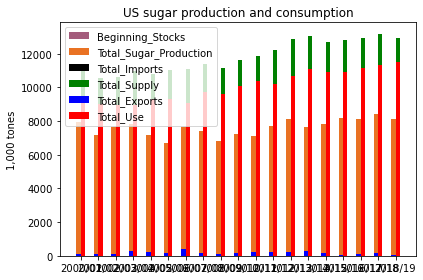

In [13]:
labels = df_USA.years
Beginning_Stocks = df_USA.Beginning_Stocks
Total_Sugar_Production = df_USA.Total_Sugar_Production
Total_Imports = df_USA.Total_Imports
Total_Supply = df_USA.Total_Supply
Total_Exports = df_USA.Total_Exports
Total_Use = df_USA.Total_Use


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Beginning_Stocks, width, color='#a45c7c', label='Beginning_Stocks')
rects2 = ax.bar(x - width/2, Total_Sugar_Production, width, color='#E97223', label='Total_Sugar_Production')
rects3 = ax.bar(x + width/2, Total_Imports, width, color='black', label='Total_Imports')
rects4 = ax.bar(x + width/2, Total_Supply, width, color='green', label='Total_Supply')
rects5 = ax.bar(x - width/2, Total_Exports, width, color='blue', label='Total_Exports')
rects6 = ax.bar(x + width/2, Total_Use, width, color='red', label='Total_Use')

plt.rcParams["figure.figsize"] = [15,10]

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('1,000 tones')
ax.set_title('US sugar production and consumption')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout();

In [14]:
df_USA.head(1)

,years,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
0,2000/01,2013,7956,1443,11412,128,9306,1978


Text(0, 0.5, '1,000 tones')

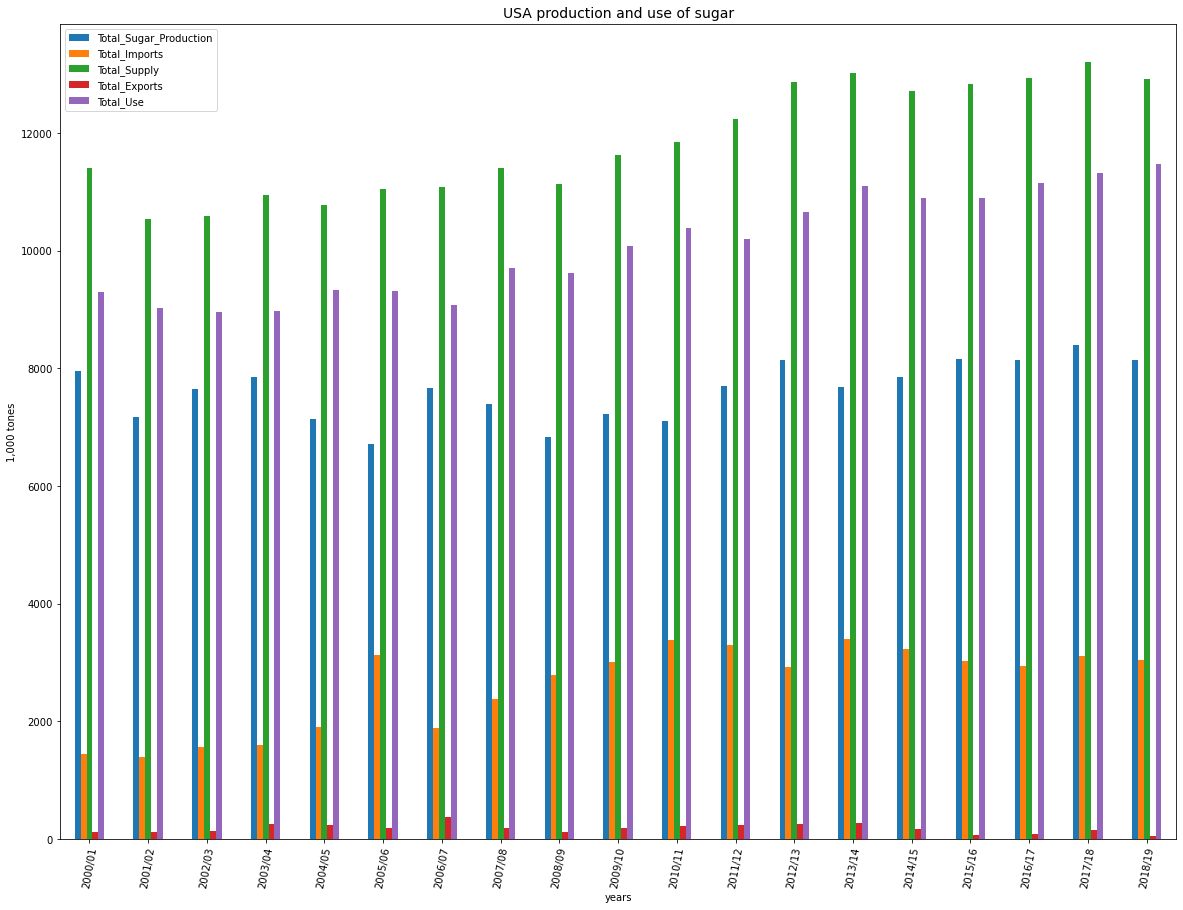

In [15]:
years = df_USA.years
#Beginning_Stocks = df_USA.Beginning_Stocks
Total_Sugar_Production = df_USA.Total_Sugar_Production
Total_Imports = df_USA.Total_Imports
Total_Supply = df_USA.Total_Supply
Total_Exports = df_USA.Total_Exports
Total_Use = df_USA.Total_Use

df_USA.plot(x='years', y = ['Total_Sugar_Production', 'Total_Imports', 'Total_Supply', 'Total_Exports', 'Total_Use'], 
            kind = 'bar', figsize =(20,15))
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('USA production and use of sugar', size=14)
plt.xticks(rotation = 80)
plt.xlabel('years')
plt.ylabel('1,000 tones')

In [16]:
df_USA.head(1)

,years,Beginning_Stocks,Total_Sugar_Production,Total_Imports,Total_Supply,Total_Exports,Total_Use,Ending_Stocks
0,2000/01,2013,7956,1443,11412,128,9306,1978


In [17]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   years                   19 non-null     object
 1   Beginning_Stocks        19 non-null     object
 2   Total_Sugar_Production  19 non-null     object
 3   Total_Imports           19 non-null     object
 4   Total_Supply            19 non-null     object
 5   Total_Exports           19 non-null     object
 6   Total_Use               19 non-null     object
 7   Ending_Stocks           19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

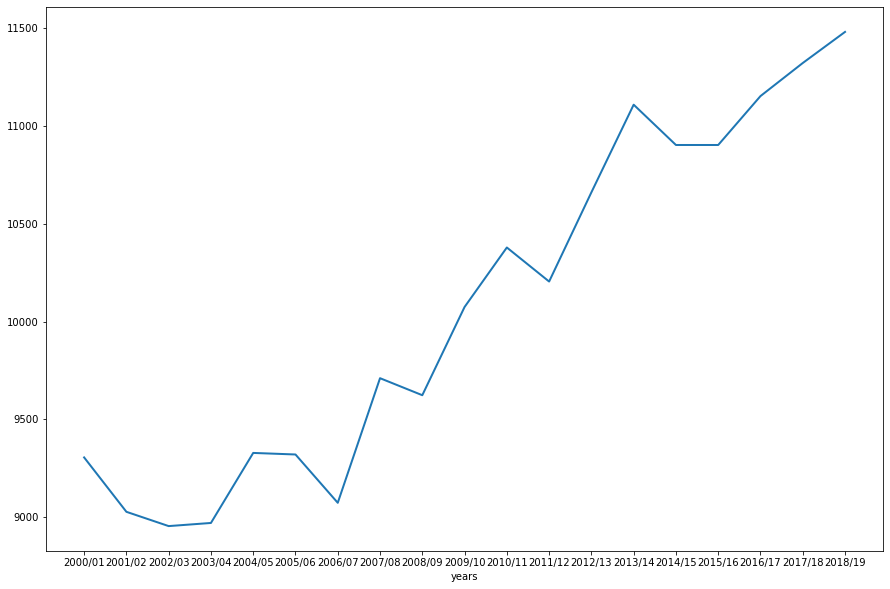

In [18]:
plt.plot(df_USA.years, df_USA.Total_Use, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('years')
plt.fill_between(df_USA.years, df_USA.Total_Use)

plt.ylabel('1,000 tones')
plt.title('Number of times each candy appears in the dataset')
plt.xticks(rotation = 80)
plt.show()

## subset world

In [ ]:
df_sugar_production

In [ ]:
df_world = df_sugar_production[df_sugar_production['countries'] == 'World']
df_world